# BACS2033 Articial Intelligence
## Heart Failure Prediction
### Group Members 
|Name|Student ID|
|:-- |--- |
|CHONG WIN YAN|22WMR05640|
|LAM WAI HONG|22WMR05667|
|LAI SI HUA|22WMR05666|

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,recall_score,f1_score,precision_score

## Dataset


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# *** load the dataset ***
# cardioRec = cadio record
patientData = pd.read_table('heart.csv', index_col=False, sep=',')

print(display(patientData))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


None


# Data Analysis

### Data Transformation, Data Preparation

In [5]:
# Data Transformation 
# check if the datatypes for the data needs to do tranform or not 
print(patientData.info())

# 1 float (decimal), 6 int and 5 object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


#### Sex (1: Male, 2: Female) 

In [6]:
patientData['Sex'] = patientData['Sex'].replace(to_replace='M', value=1)
patientData['Sex'] = patientData['Sex'].replace(to_replace='F', value=2)

patientData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,2,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,2,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,2,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### ChestPainType (1: TA, 2: ATA, 3: NAP, 4: ASY)

In [7]:
patientData['ChestPainType'] = patientData['ChestPainType'].replace(to_replace='TA', value=1)
patientData['ChestPainType'] = patientData['ChestPainType'].replace(to_replace='ATA', value=2)
patientData['ChestPainType'] = patientData['ChestPainType'].replace(to_replace='NAP', value=3)
patientData['ChestPainType'] = patientData['ChestPainType'].replace(to_replace='ASY', value=4)

patientData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,Normal,172,N,0.0,Up,0
1,49,2,3,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,2,130,283,0,ST,98,N,0.0,Up,0
3,48,2,4,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,3,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,4,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,4,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,2,2,130,236,0,LVH,174,N,0.0,Flat,1


#### RestingECG (1: Normal, 2: ST, 3: LVH) 

In [8]:
# change RestingECG (Normal to 1, ST to 2, LVH to 3)
patientData['RestingECG'] = patientData['ChestPainType'].replace(to_replace='Normal', value=1)
patientData['RestingECG'] = patientData['ChestPainType'].replace(to_replace='ST', value=2)
patientData['RestingECG'] = patientData['ChestPainType'].replace(to_replace='LVH', value=3)

patientData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,N,0.0,Up,0
1,49,2,3,160,180,0,3,156,N,1.0,Flat,1
2,37,1,2,130,283,0,2,98,N,0.0,Up,0
3,48,2,4,138,214,0,4,108,Y,1.5,Flat,1
4,54,1,3,150,195,0,3,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,1,132,N,1.2,Flat,1
914,68,1,4,144,193,1,4,141,N,3.4,Flat,1
915,57,1,4,130,131,0,4,115,Y,1.2,Flat,1
916,57,2,2,130,236,0,2,174,N,0.0,Flat,1


#### ExerciseAngina (1: Yes, 2: No)

In [9]:
patientData['ExerciseAngina'] = patientData['ExerciseAngina'].replace(to_replace='Y', value=1)
patientData['ExerciseAngina'] = patientData['ExerciseAngina'].replace(to_replace='N', value=2)

patientData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,2,0.0,Up,0
1,49,2,3,160,180,0,3,156,2,1.0,Flat,1
2,37,1,2,130,283,0,2,98,2,0.0,Up,0
3,48,2,4,138,214,0,4,108,1,1.5,Flat,1
4,54,1,3,150,195,0,3,122,2,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,1,132,2,1.2,Flat,1
914,68,1,4,144,193,1,4,141,2,3.4,Flat,1
915,57,1,4,130,131,0,4,115,1,1.2,Flat,1
916,57,2,2,130,236,0,2,174,2,0.0,Flat,1


#### ST_Sloppe (1: Up, 2: Flat, 3: Down)

In [10]:
patientData['ST_Slope'] = patientData['ST_Slope'].replace(to_replace='Up', value=1)
patientData['ST_Slope'] = patientData['ST_Slope'].replace(to_replace='Flat', value=2)
patientData['ST_Slope'] = patientData['ST_Slope'].replace(to_replace='Down', value=3)

patientData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,2,0.0,1,0
1,49,2,3,160,180,0,3,156,2,1.0,2,1
2,37,1,2,130,283,0,2,98,2,0.0,1,0
3,48,2,4,138,214,0,4,108,1,1.5,2,1
4,54,1,3,150,195,0,3,122,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,1,132,2,1.2,2,1
914,68,1,4,144,193,1,4,141,2,3.4,2,1
915,57,1,4,130,131,0,4,115,1,1.2,2,1
916,57,2,2,130,236,0,2,174,2,0.0,2,1


In [11]:
# Data info
patientData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [12]:
patientData.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,3.251634,132.396514,198.799564,0.233115,3.251634,136.809368,1.595861,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.931031,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,3.000000,120.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,4.000000,138.000000,2.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,4.000000,156.000000,2.000000,1.500000,2.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,4.000000,202.000000,2.000000,6.200000,3.000000,1.000000


In [13]:
patientData.shape

(918, 12)

In [14]:
patientData.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Data Visualization

## Countplot

In [15]:
from matplotlib import rcParams

# set larger figure size (enlarge)
rcParams['figure.figsize'] = 11, 8

### 1. Countplot of Age

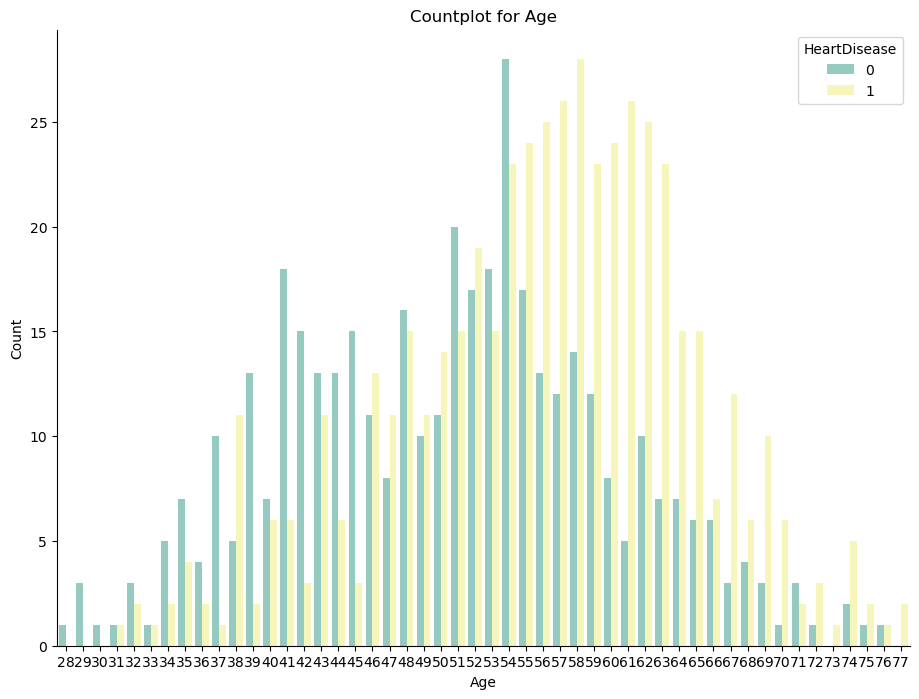

In [16]:
sns.countplot(data = patientData, x='Age', hue='HeartDisease', palette='Set3')

plt.title('Countplot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()

plt.show()

### 2. Sex 
`1: Male, 2: Female`

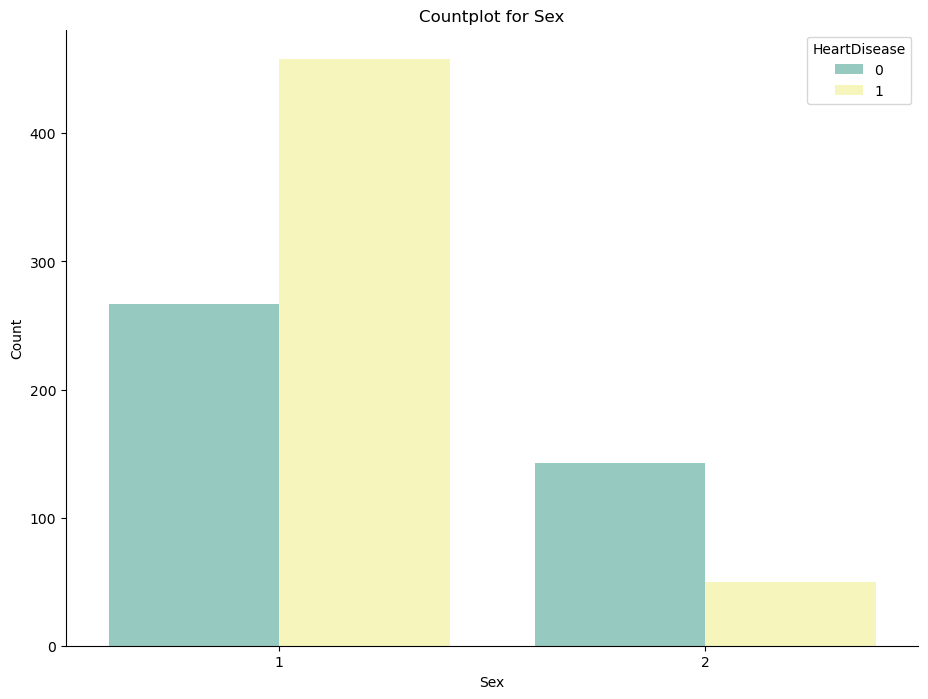

In [17]:
sns.countplot(data = patientData, x='Sex', hue='HeartDisease', palette='Set3')

plt.title('Countplot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
sns.despine()

plt.show()

### 3. ChestPainType   
`1: TA, 2: ATA, 3: NAP, 4: ASY`

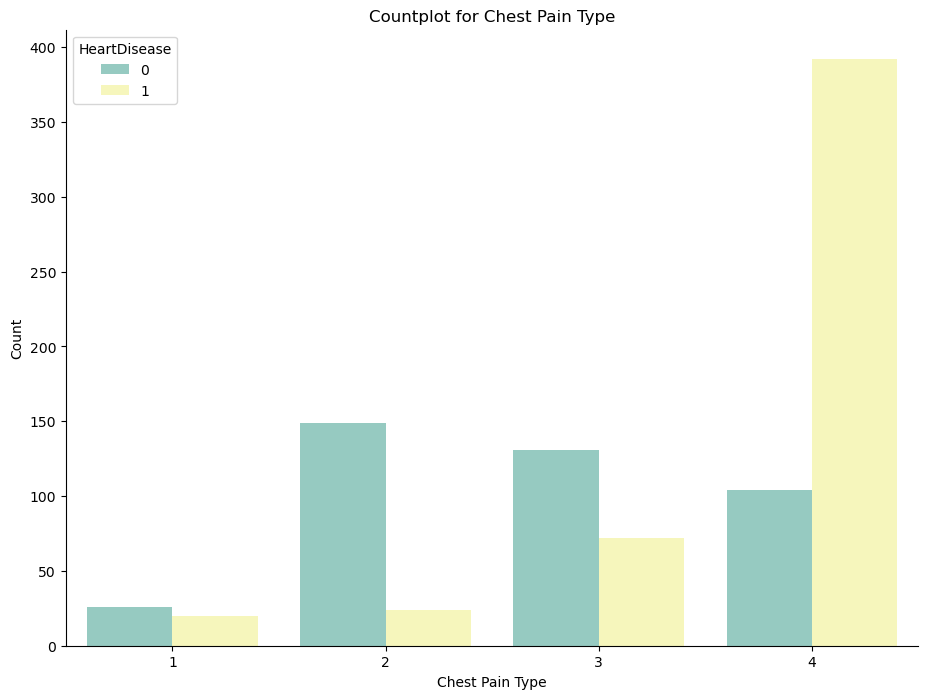

In [18]:
sns.countplot(data = patientData, x='ChestPainType', hue='HeartDisease', palette='Set3')

plt.title('Countplot for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
sns.despine()

plt.show()

### 4. FastingBS 
`1: if FastingBS > 120 mg/dl, 0: otherwise`

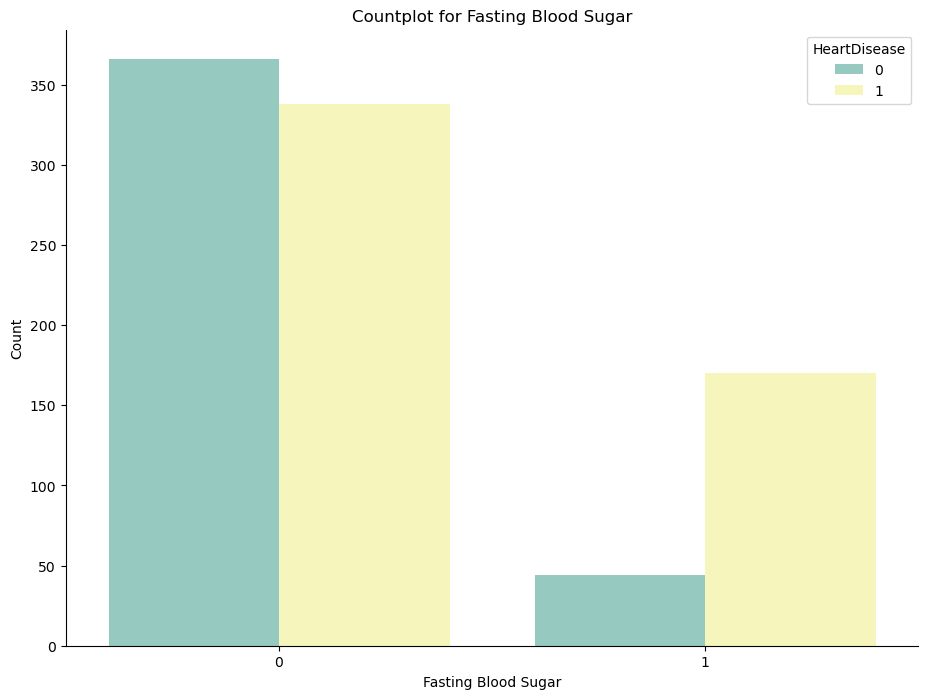

In [19]:
sns.countplot(data = patientData, x='FastingBS', hue='HeartDisease', palette='Set3')

plt.title('Countplot for Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
sns.despine()

plt.show()

### 5. RestingECG 
`1: Normal, 2: ST, 3: LVH`

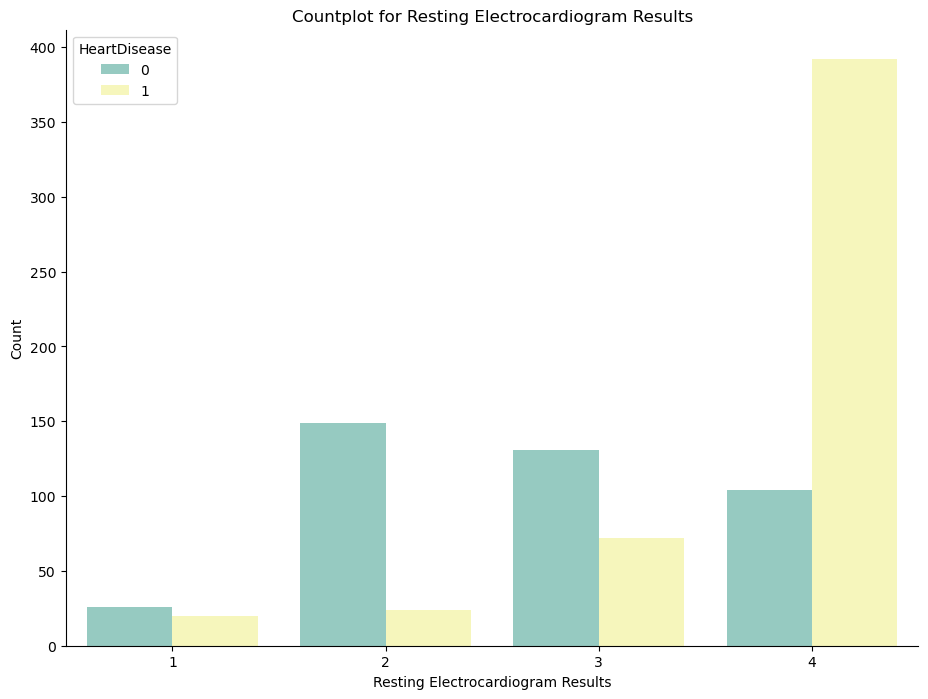

In [20]:
sns.countplot(data = patientData, x='RestingECG', hue='HeartDisease', palette='Set3')

plt.title('Countplot for Resting Electrocardiogram Results')
plt.xlabel('Resting Electrocardiogram Results')
plt.ylabel('Count')
sns.despine()

plt.show()

### 6. ExerciseAngina 
`1: Yes, 2: No`

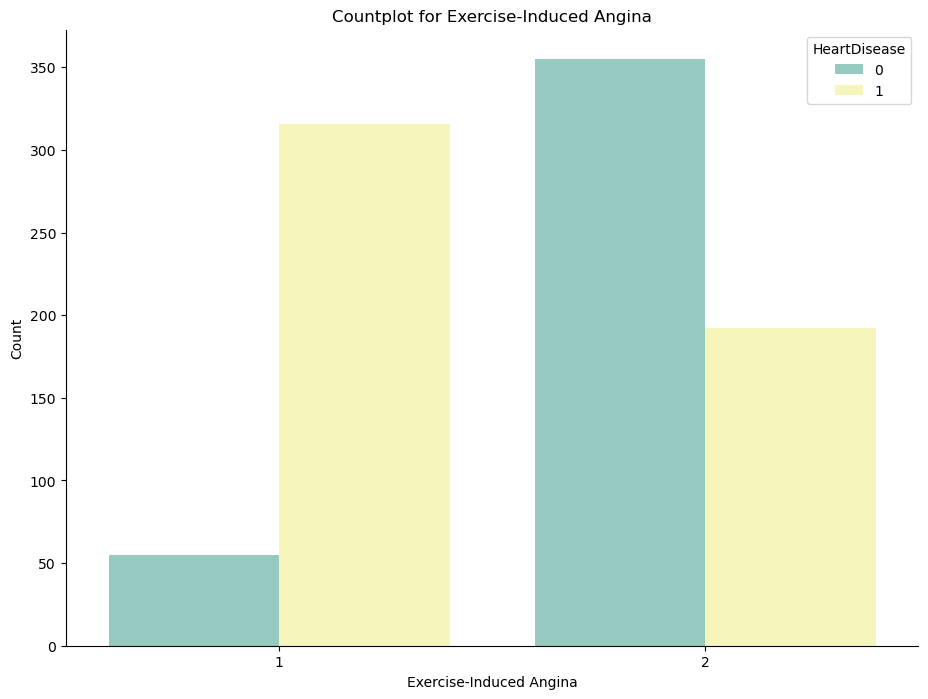

In [21]:
sns.countplot(data = patientData, x='ExerciseAngina', hue='HeartDisease', palette='Set3')

plt.title('Countplot for Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
sns.despine()

plt.show()

### 7. Countplot for Nominal Data 

Text(0, 0.5, 'Count')

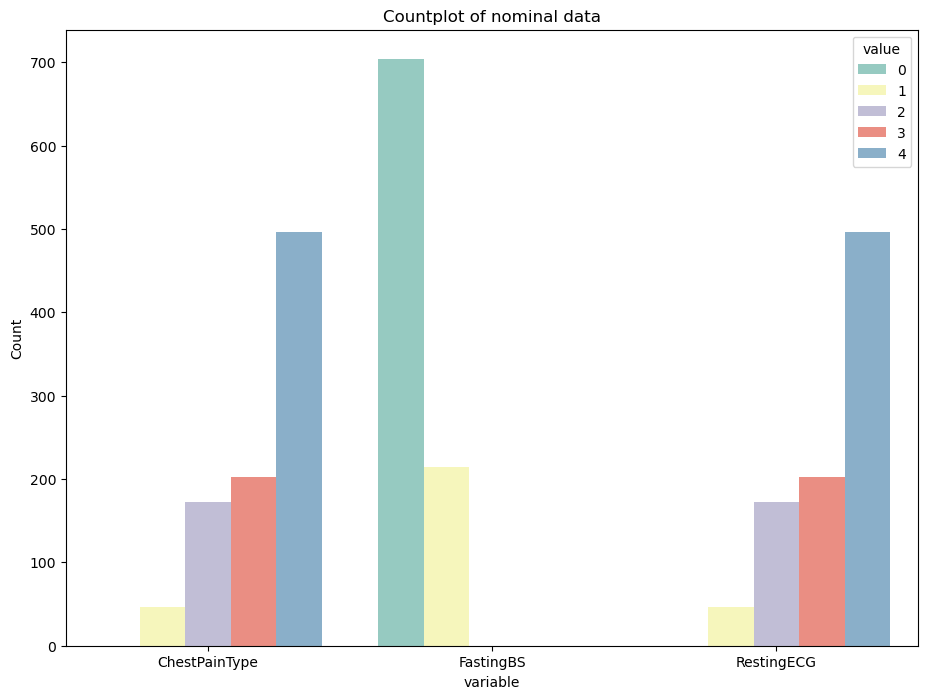

In [22]:
# ChestPainType, FastingBS, RestingECG
patient_nominal = pd.melt(patientData.loc[:,['ChestPainType','FastingBS', 'RestingECG']])
sns.countplot(x="variable", hue="value",data= patient_nominal, palette='Set3')

plt.title('Countplot of nominal data')
plt.ylabel('Count')

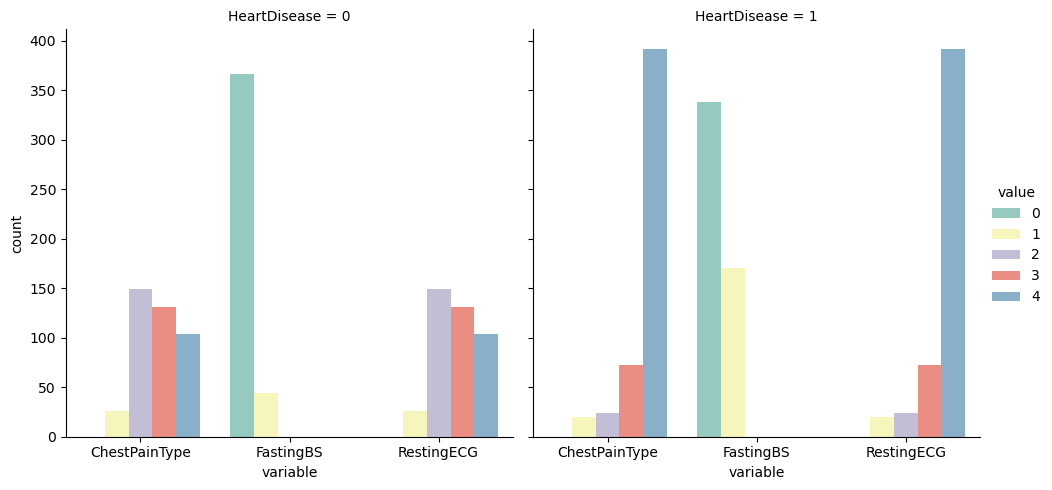

In [23]:
# observe nominal data by HeartDisease
patient_norminal_label = pd.melt(patientData, id_vars=['HeartDisease'], value_vars=['ChestPainType','FastingBS', 'RestingECG'])
sns.catplot(x="variable", hue="value", col="HeartDisease",data=patient_norminal_label, kind="count", palette='Set3')

plt.show()

## Pie Chart for binary Independent Variables

Report of Chest Pain Type

Number of patient with typical angina   (represent as 1 in the data set) : 46
Number of patient with atypical angina  (represent as 2 in the data set) : 173
Number of patient with non-anginal pain (represent as 3 in the data set) : 203
Number of patient with asymptomatic     (represent as 4 in the data set) : 496


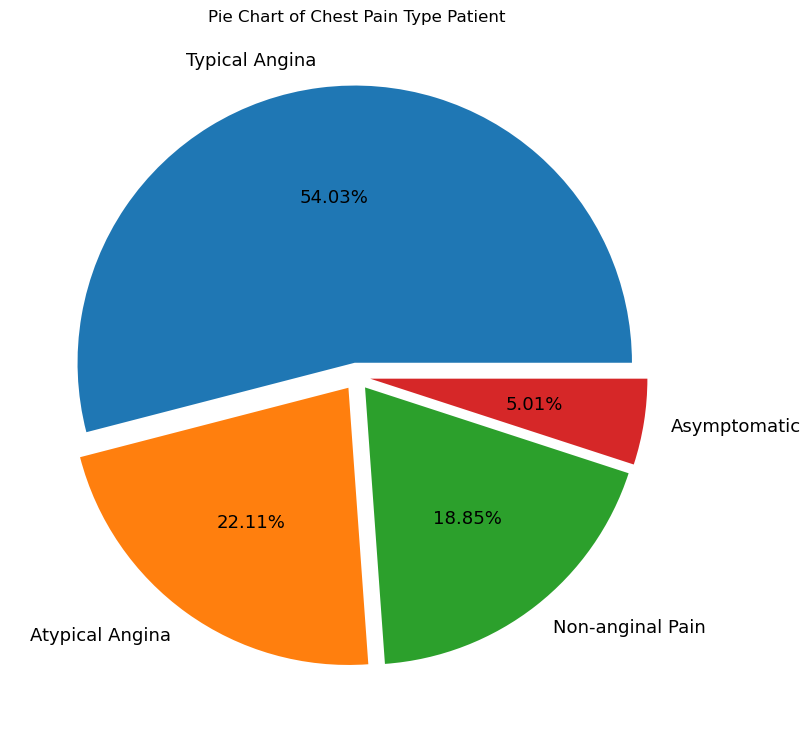

In [24]:
summary_chestpt = patientData.ChestPainType.describe()
summary_chestpt


#create pie chart
print("==========================")
print("Report of Chest Pain Type")
print("==========================")
print("")
sum_chestpt = patientData.ChestPainType.value_counts()
print('Number of patient with typical angina   (represent as 1 in the data set) :', sum_chestpt[1])
print('Number of patient with atypical angina  (represent as 2 in the data set) :', sum_chestpt[2])
print('Number of patient with non-anginal pain (represent as 3 in the data set) :', sum_chestpt[3])
print('Number of patient with asymptomatic     (represent as 4 in the data set) :', sum_chestpt[4])

plt.figure(figsize=(10,9))
sum_chestpt.plot.pie(labels=['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptomatic'],
                     fontsize = 13,autopct = '%1.2f%%', explode=[0.05,0.05,0.05,0.05])

plt.title('Pie Chart of Chest Pain Type Patient')
plt.ylabel('')
plt.show()

Report of Resting Electrocardiogram Results

Number of patient with normal result                                     (represent as 1 in the data set) : 46
Number of patient with ST-T wave abnormality                             (represent as 2 in the data set) : 173
Number of patient with probable or definite left ventricular hypertrophy (represent as 3 in the data set) : 203


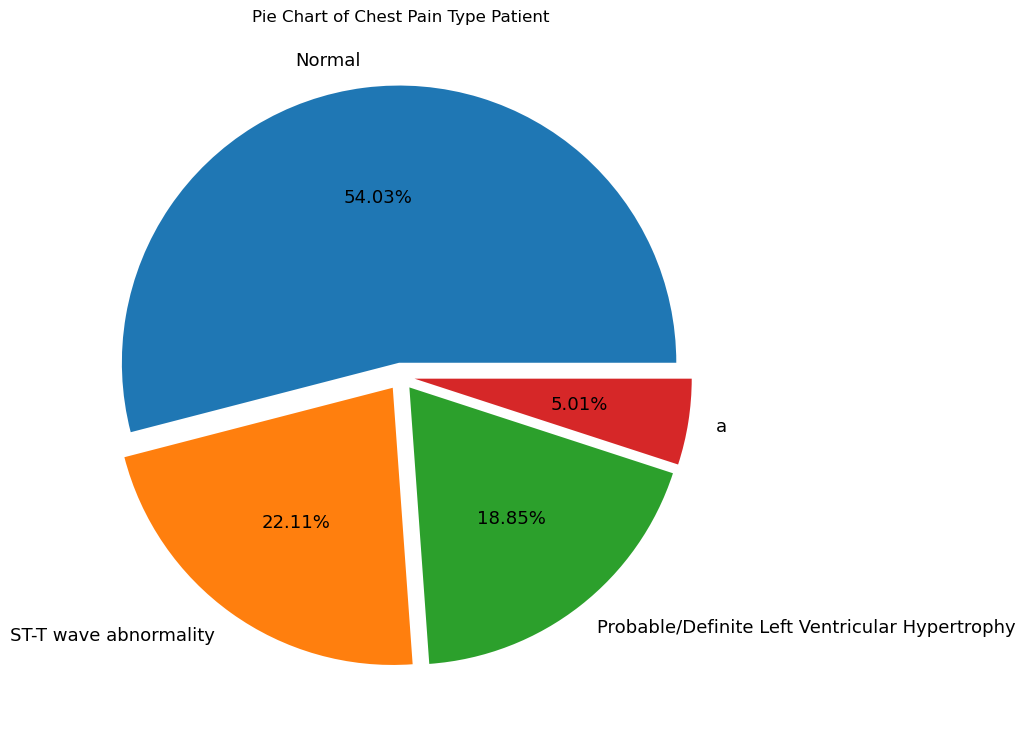

In [25]:
summary_ecg = patientData.RestingECG.describe()
summary_ecg


#create pie chart
print("=============================================")
print("Report of Resting Electrocardiogram Results")
print("============================================")
print("")
sum_ecg = patientData.RestingECG.value_counts()
print('Number of patient with normal result                                     (represent as 1 in the data set) :', sum_ecg[1])
print('Number of patient with ST-T wave abnormality                             (represent as 2 in the data set) :', sum_ecg[2])
print('Number of patient with probable or definite left ventricular hypertrophy (represent as 3 in the data set) :', sum_ecg[3])

plt.figure(figsize=(10,9))
sum_ecg.plot.pie(labels=['Normal','ST-T wave abnormality','Probable/Definite Left Ventricular Hypertrophy','a'],
                     fontsize = 13,autopct = '%1.2f%%', explode=[0.05,0.05,0.05,0.05])
plt.title('Pie Chart of Chest Pain Type Patient')
plt.ylabel('')
plt.show()

Report of Fasting Blood Sugar

Number of patient with more than 120             (represent as 1 in the data set) : 214
Number of patient with less than or equal to 120 (represent as 0 in the data set) : 704


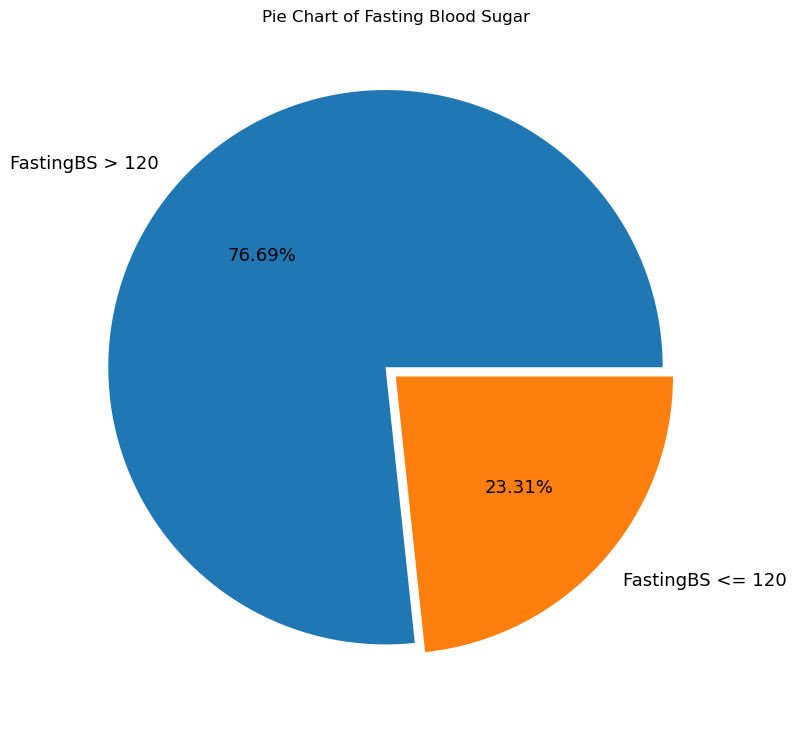

In [26]:
summary_fastbs = patientData.FastingBS.describe()
summary_fastbs


#create pie chart
print("==============================")
print("Report of Fasting Blood Sugar")
print("==============================")
print("")
sum_fastbs = patientData.FastingBS.value_counts()
print('Number of patient with more than 120             (represent as 1 in the data set) :', sum_fastbs[1])
print('Number of patient with less than or equal to 120 (represent as 0 in the data set) :', sum_fastbs[0])

plt.figure(figsize=(10,9))
sum_fastbs.plot.pie(labels=['FastingBS > 120','FastingBS <= 120'],
                             fontsize = 13, autopct ='%1.2f%%', explode=[0.05,0])

plt.title('Pie Chart of Fasting Blood Sugar')
plt.ylabel('')
plt.show()

## Histogram 

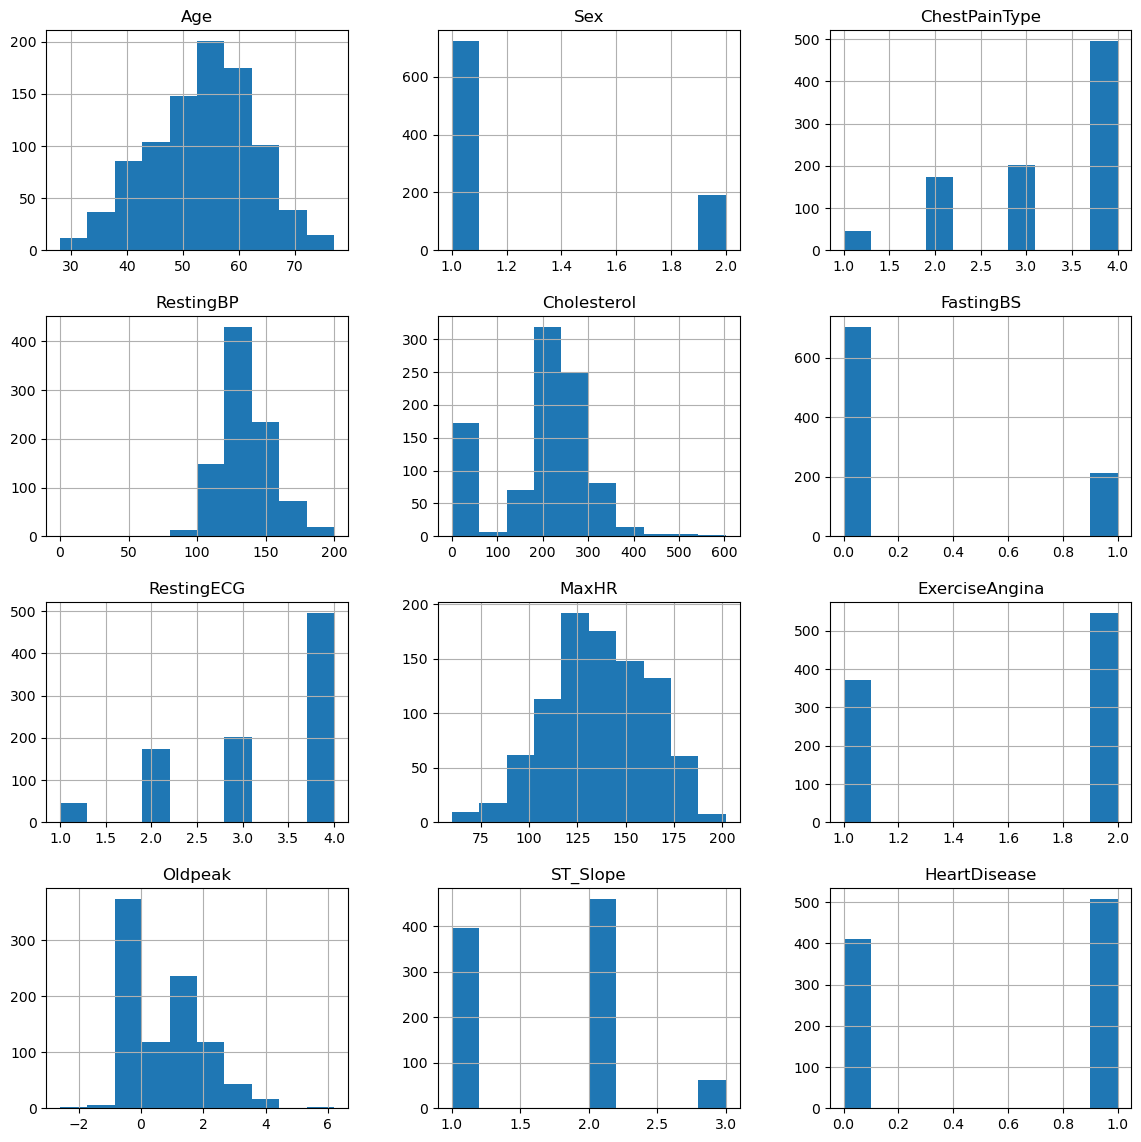

In [27]:
import matplotlib.pyplot as plt

numbers = pd.Series(patientData.columns)
patientData[numbers].hist(figsize = (14, 14))
plt.show()

## Heatmap 

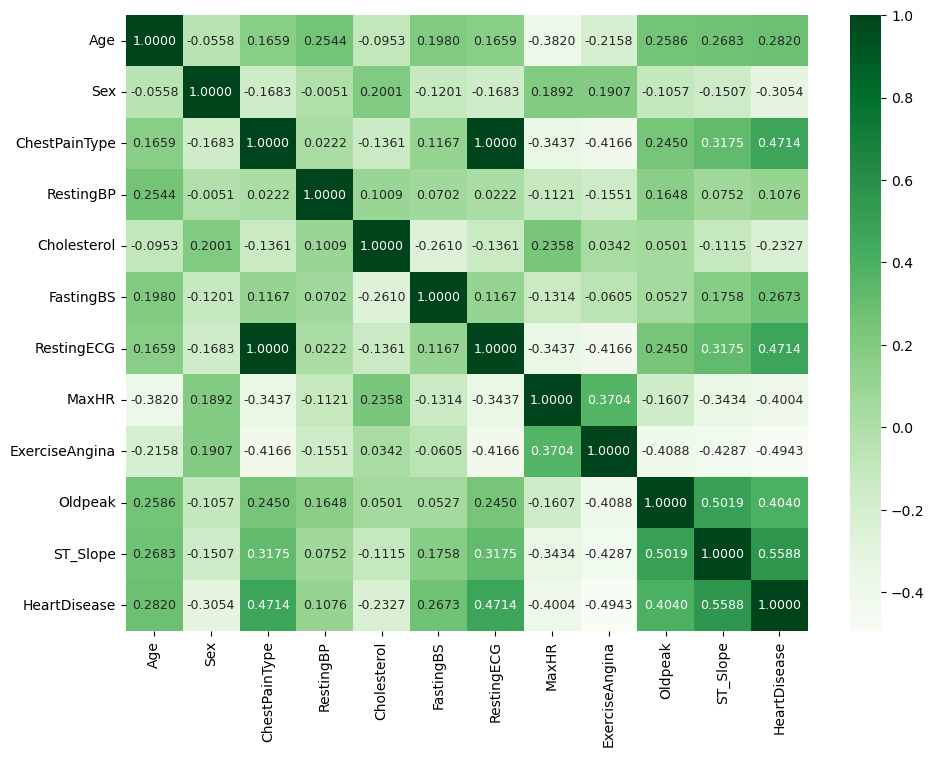

In [25]:
# Correlation Matrix - show corelation coefficient of variables 
sns.heatmap(patientData.corr(), 
        cmap="Greens",
        fmt='.4f',
        annot=True,
        annot_kws={"size":9})

# display
plt.show()

### Drop meaningless column

In [26]:
# Drop column that have negative correlation coefficient 
# r = -0.3054
patientData = patientData.drop('Sex', axis=1)
# r = -0.2327
patientData = patientData.drop('Cholesterol', axis=1)
# r = -0.4004
patientData = patientData.drop('MaxHR', axis=1) 
# r = -0.4943
patientData = patientData.drop('ExerciseAngina', axis=1)

# Display data
patientData

,Age,ChestPainType,RestingBP,FastingBS,RestingECG,Oldpeak,ST_Slope,HeartDisease
0,40,2,140,0,2,0.0,1,0
1,49,3,160,0,3,1.0,2,1
2,37,2,130,0,2,0.0,1,0
3,48,4,138,0,4,1.5,2,1
4,54,3,150,0,3,0.0,1,0
...,...,...,...,...,...,...,...,...
913,45,1,110,0,1,1.2,2,1
914,68,4,144,1,4,3.4,2,1
915,57,4,130,0,4,1.2,2,1
916,57,2,130,0,2,0.0,2,1


## Pairplot 

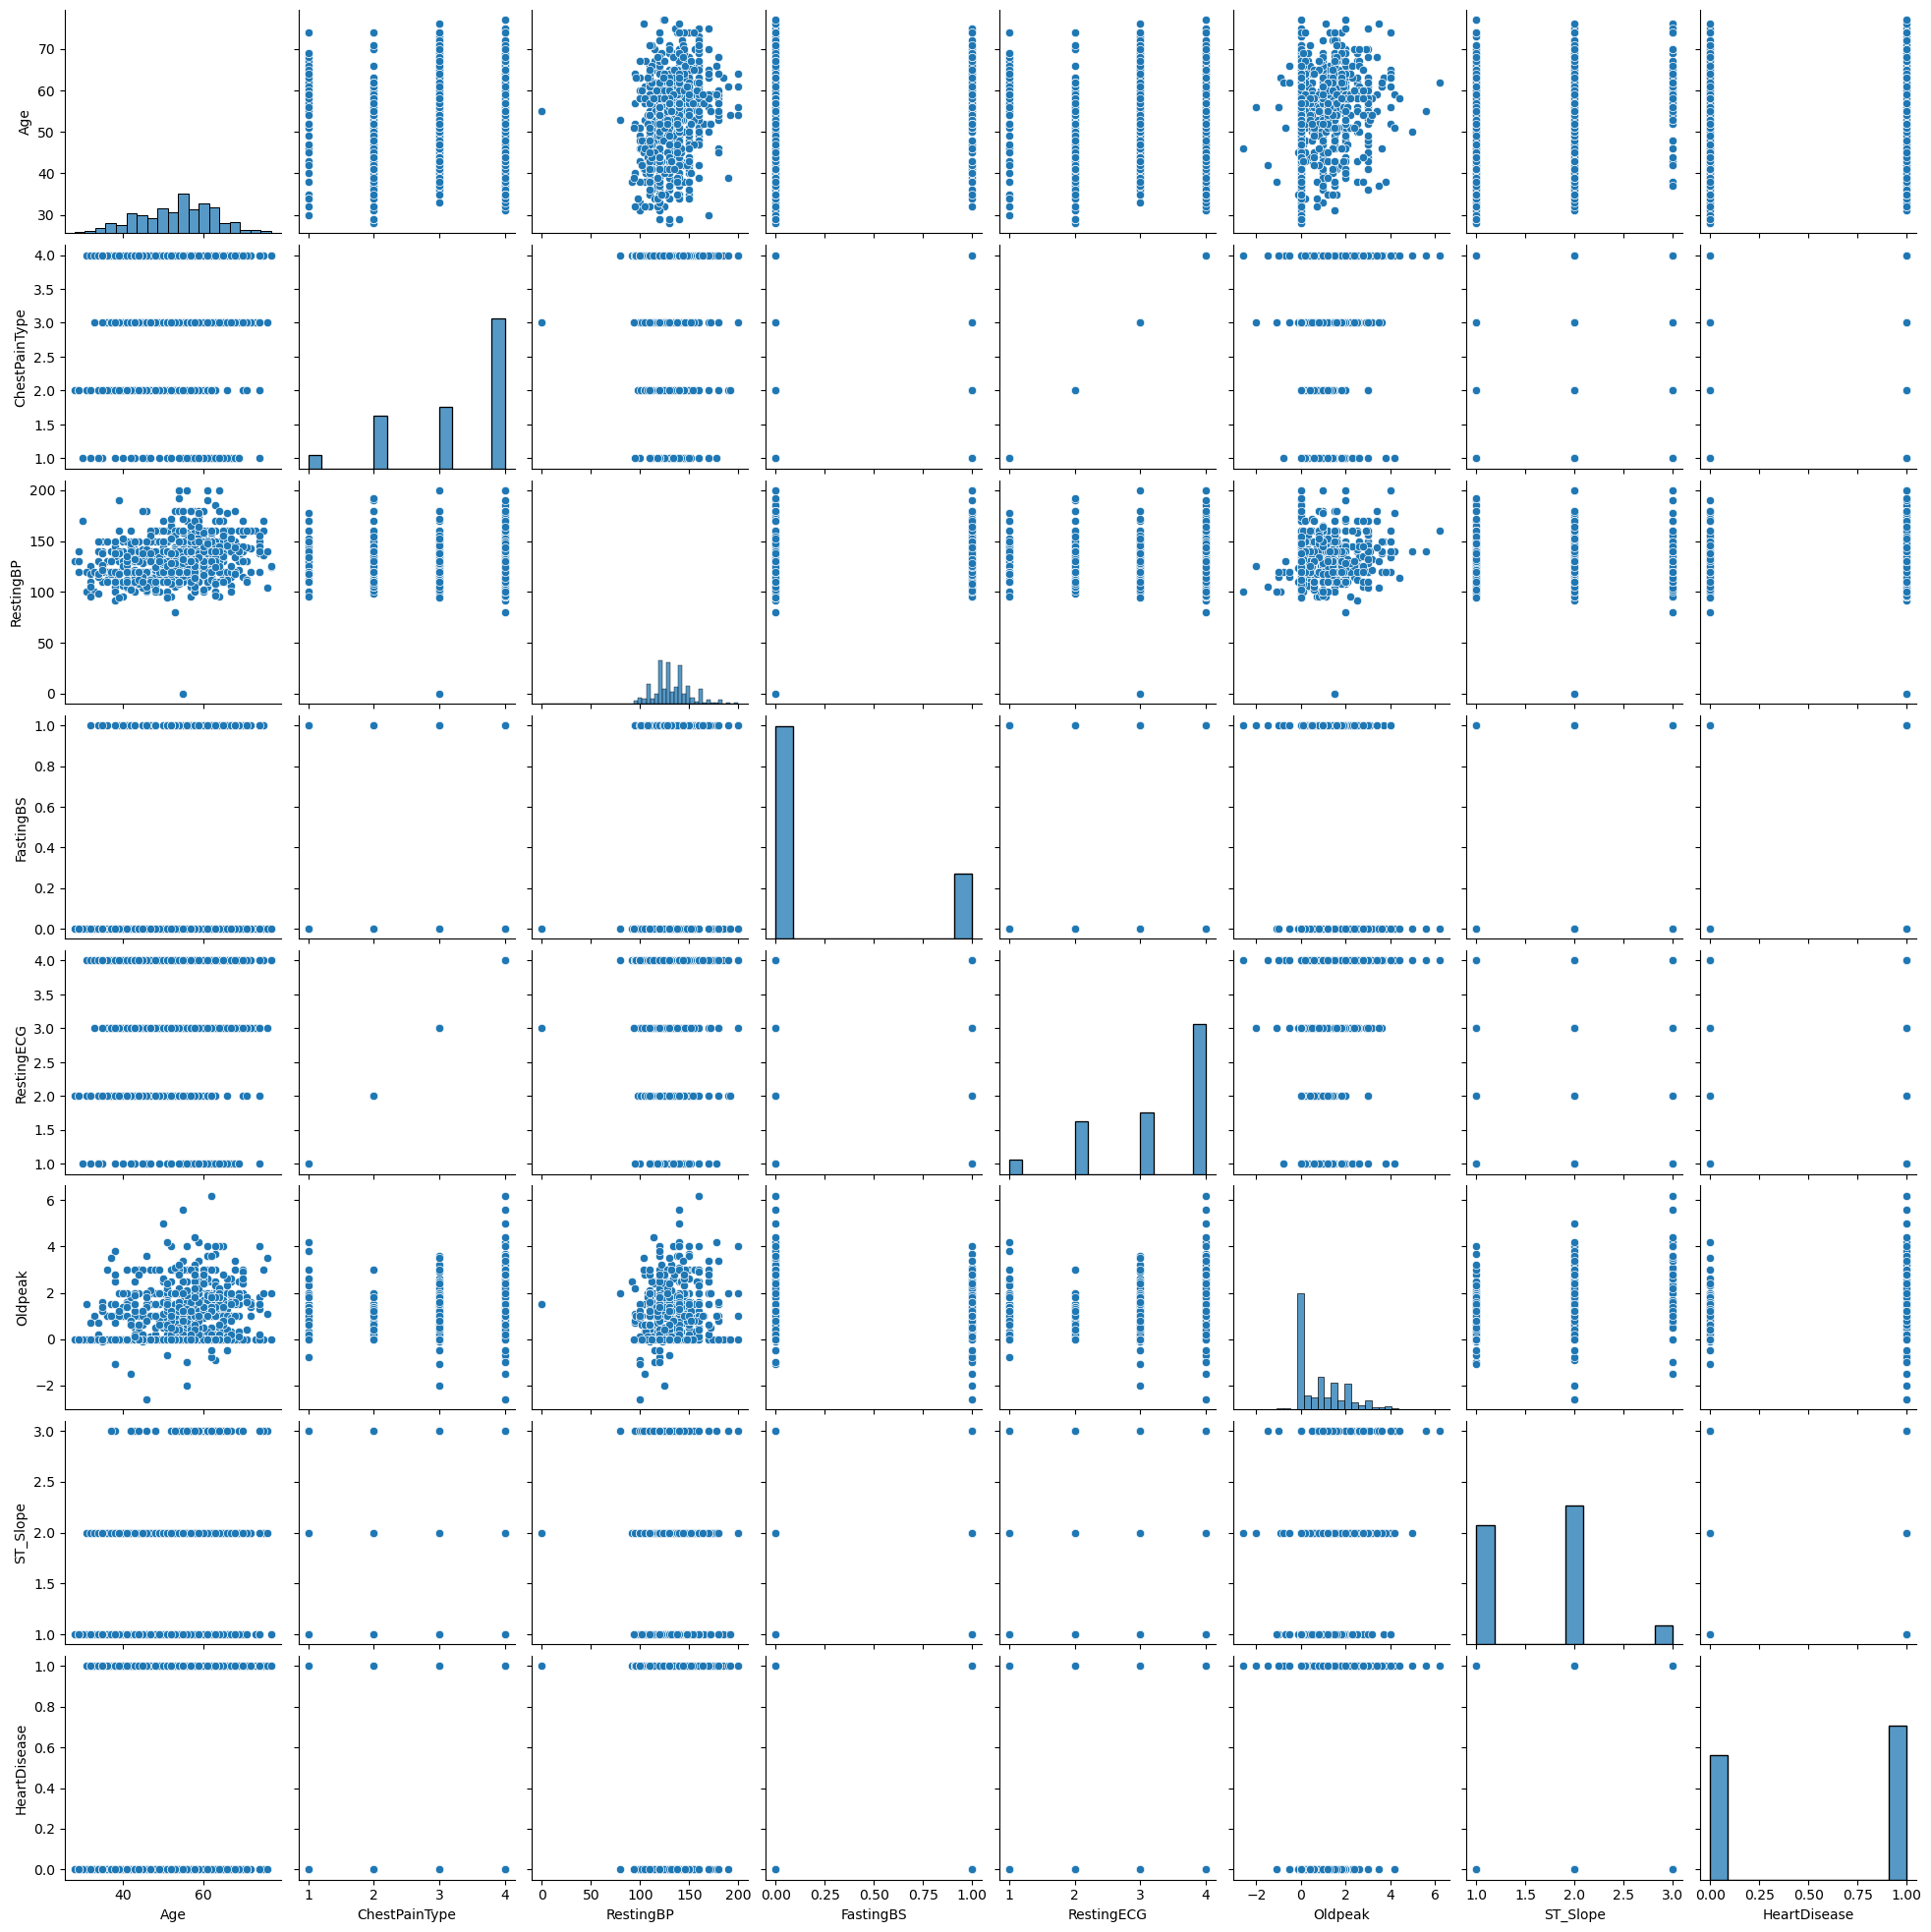

In [27]:
import seaborn as sns 
sns.pairplot(patientData)

## Outlier Detection

In [28]:
# Show discrete data only 
patientData.loc[:,['Age','RestingBP', 'Oldpeak']].describe().round(4)

,Age,RestingBP,Oldpeak
count,918.0000,918.0000,918.0000
mean,53.5109,132.3965,0.8874
std,9.4326,18.5142,1.0666
min,28.0000,0.0000,-2.6000
25%,47.0000,120.0000,0.0000
50%,54.0000,130.0000,0.6000
75%,60.0000,140.0000,1.5000
max,77.0000,200.0000,6.2000


### Boxplot

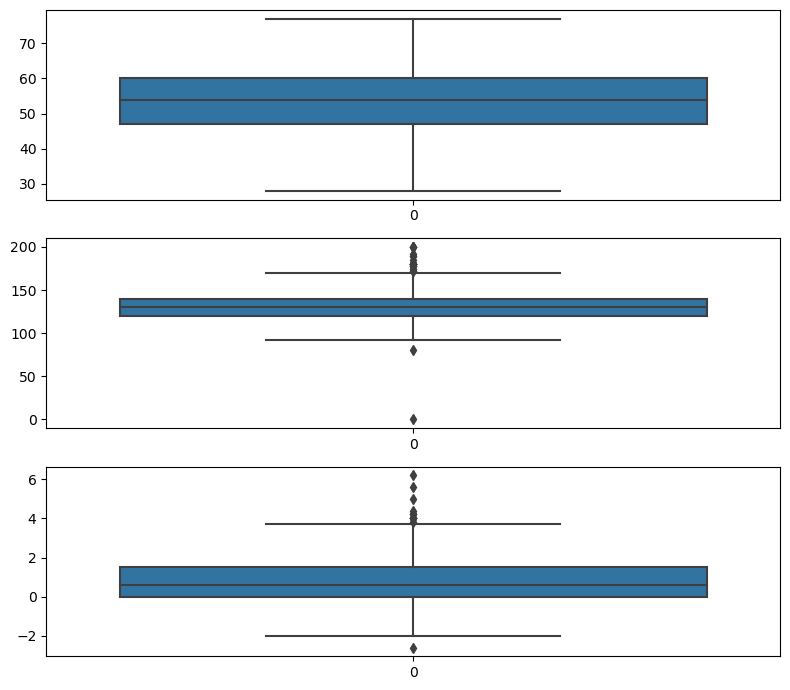

In [29]:
# Check data is category OR discrete
import warnings

warnings.simplefilter("ignore")

fig, axs = plt.subplots(3,figsize=(8,7))

ptl1 = sns.boxplot(patientData['Age'], ax = axs[0])
ptl2 = sns.boxplot(patientData['RestingBP'], ax = axs[1])
ptl3 = sns.boxplot(patientData['Oldpeak'], ax = axs[2])

plt.tight_layout()


In [30]:
# 2. IQR - Interquatile range

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [31]:
# Outlier on column 1 - 'Age'
patientData_outiers_c1 = outliers_iqr(patientData['Age'])
# Outlier on column 2 - 'RestingBP'
patientData_outiers_c2 = outliers_iqr(patientData['RestingBP'])
# Outlier on column 3 - 'Oldpeak'
patientData_outiers_c3 = outliers_iqr(patientData['Oldpeak'])

In [32]:
# Show statistics information of outlier of 3 columns
patientData_outiers_desc = pd.concat([patientData.iloc[patientData_outiers_c1[0]].Age.describe(),
                               patientData.iloc[patientData_outiers_c2[0]].RestingBP.describe(),
                               patientData.iloc[patientData_outiers_c3[0]].Oldpeak.describe()],
                               axis=1)
patientData_outiers_desc

,Age,RestingBP,Oldpeak
count,0.0,28.000000,16.000000
mean,NaN,173.178571,3.925000
std,NaN,40.019489,1.864582
min,NaN,0.000000,-2.600000
25%,NaN,178.000000,4.000000
50%,NaN,180.000000,4.000000
75%,NaN,186.250000,4.250000
max,NaN,200.000000,6.200000


In [33]:
# Drop row of outliers
patientData_cleaned = patientData.copy()

# Let Outliers row val become NaN
patientData_cleaned.iloc[patientData_outiers_c1[0]] = np.nan
patientData_cleaned.iloc[patientData_outiers_c2[0]] = np.nan
patientData_cleaned.iloc[patientData_outiers_c3[0]] = np.nan

print(patientData_cleaned.isnull().sum())

patientData_cleaned = patientData_cleaned.dropna(axis = 0)

# current ttl number of observation
print("\n>>> Total obsearvation preserved:", len(patientData_cleaned))

Age              42
ChestPainType    42
RestingBP        42
FastingBS        42
RestingECG       42
Oldpeak          42
ST_Slope         42
HeartDisease     42
dtype: int64

>>> Total obsearvation preserved: 876


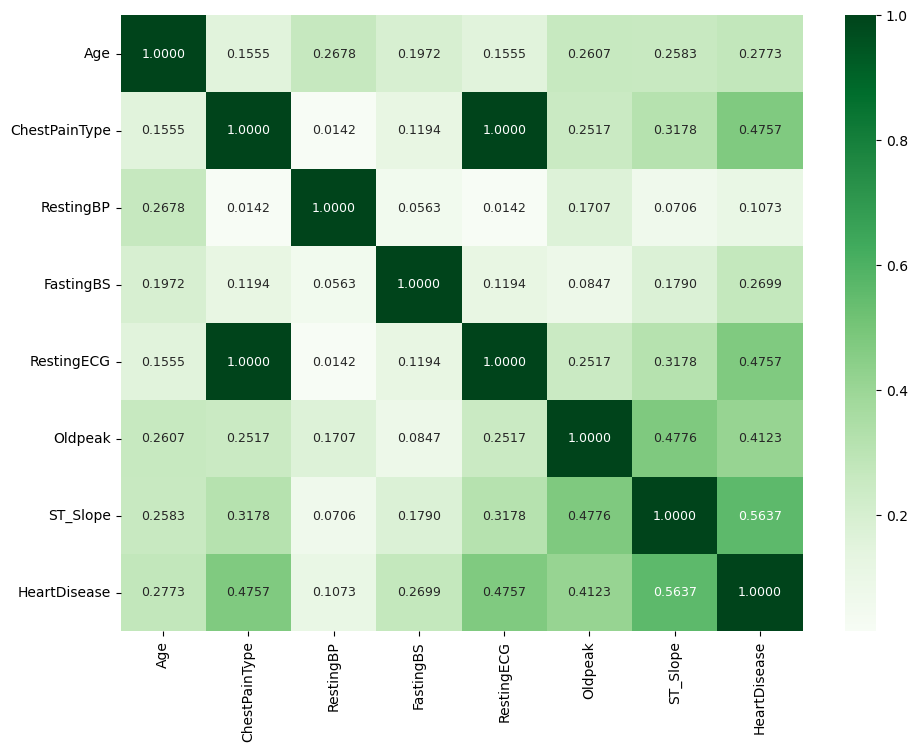

In [34]:
# *** Correlation Matrix - heatmap ***
# plot the graph - to show correlation coeffiecient of variables
sns.heatmap(patientData_cleaned.corr(), 
        cmap="Greens",
        fmt='.4f',
        annot=True,
        annot_kws={"size":9})

# display
plt.show()

In [35]:
# *** Splitting data normalized into train and test data ***

# X - features (drop label)
X_patientData = patientData_cleaned.drop('HeartDisease', axis=1)
# Y - label
y_patientData = patientData_cleaned['HeartDisease']

# Split data to test and train (train: 80%, test: 20%)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_patientData, y_patientData,test_size=0.2,random_state=3)


## Checking for missing values

In [36]:
# Check whether having missing value
print(patientData.isnull().any().any())

False


In [37]:
patientData.isnull().sum() # Checking for null values

Age              0
ChestPainType    0
RestingBP        0
FastingBS        0
RestingECG       0
Oldpeak          0
ST_Slope         0
HeartDisease     0
dtype: int64

# Modeling - Classification

## 1. K-Nearest Neighbour (KNN) - Lai Si Hua

Minimum error:- 0.2556818181818182 at K = 1


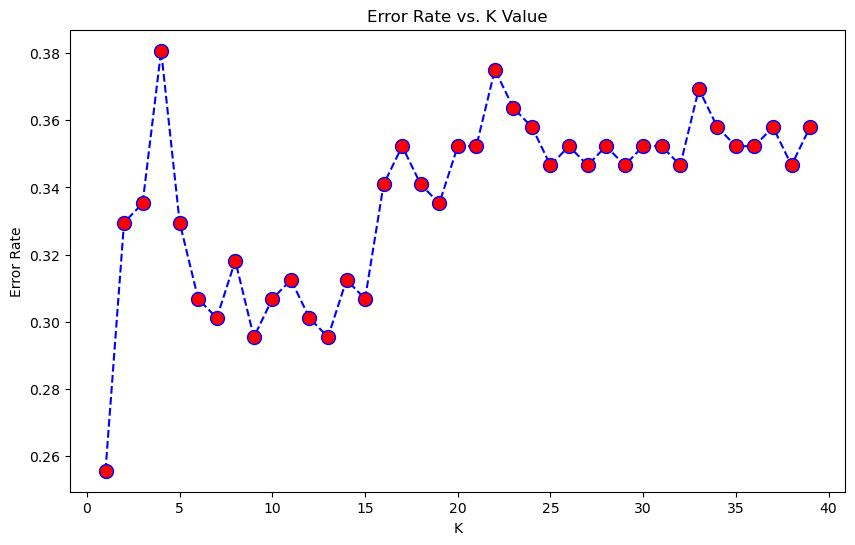

In [38]:
# StandardScaler - optimal k

#feature Scaling  
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

st_x= StandardScaler()    
x_train= st_x.fit_transform(Xtrain)    
x_test= st_x.transform(Xtest)

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtrain,ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != ytest))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

# default: n_neighbors (k) = 1
# as follow result above, use optimal k = 1 as n_neighbors
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(Xtrain, ytrain) # fit data to the model

knn_accuracy = knn.score(Xtest, ytest)
knn_rmse = mean_squared_error(ytest,knn.predict(Xtest),squared=False)
knn_mse = mean_squared_error(ytest,knn.predict(Xtest))

print("Accuracy: ", knn_accuracy)
print("RMSE: ", knn_rmse)
print("MSE: ", knn_mse)

Accuracy:  0.7443181818181818
RMSE:  0.5056498968474316
MSE:  0.2556818181818182


## 2. SVM - Lai Si Hua
- `Fit Model by train data`

In [40]:
# SVM
from sklearn.svm import SVC

clf = SVC()
clf.fit(Xtrain, ytrain)

clf_accuracy = clf.score(Xtest, ytest)
clf_rmse = mean_squared_error(ytest,clf.predict(Xtest),squared=False)
clf_mse = mean_squared_error(ytest,clf.predict(Xtest))

print("Accuracy: ", clf_accuracy)
print("RMSE: ", clf_rmse)
print("MSE: ", clf_mse)


Accuracy:  0.6477272727272727
RMSE:  0.5935256753272998
MSE:  0.3522727272727273


## 3. Logistic Regression - Lam Wai Hong
- `Fit Model by train data`

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(Xtrain, ytrain)

logistic_accuracy = logistic.score(Xtest, ytest)
logistic_rmse = mean_squared_error(ytest,logistic.predict(Xtest),squared=False)
logistic_mse = mean_squared_error(ytest,logistic.predict(Xtest))

print("Accuracy: ", logistic_accuracy)
print("RMSE: ", logistic_rmse)
print("MSE: ", logistic_mse)

Accuracy:  0.8125
RMSE:  0.4330127018922193
MSE:  0.1875


- `ROC Curve`

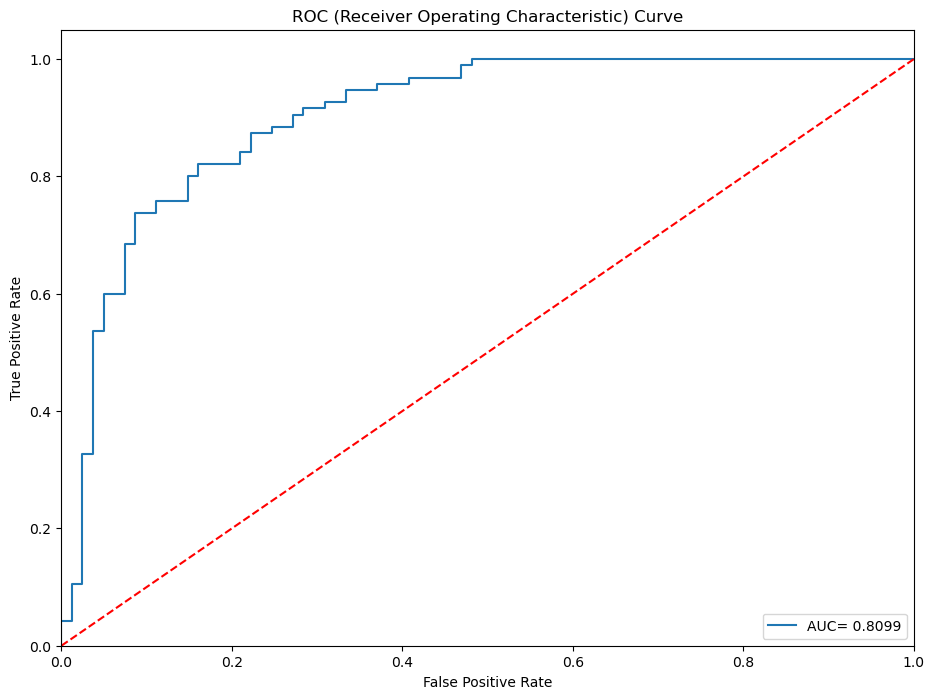

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logistic_roc_auc = roc_auc_score(ytest, logistic.predict(Xtest))
fpr, tpr, thresholds = roc_curve(ytest, logistic.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC= %0.4f' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.legend(loc="lower right")
plt.show()

## 4. Decision Tree - Chong Win Yan

In [43]:
y_data = patientData['HeartDisease']
X_data = patientData.drop(['HeartDisease'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size = 0.2)
accuracy_list = []

In [44]:
dt = DecisionTreeClassifier(random_state=0)
params = {'max_depth': [2, 3, 5, 10, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'criterion': ["gini", "entropy"] }

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [45]:
grid_search.best_estimator_
dt_best=grid_search.best_estimator_
dt_pred = dt_best.predict(X_test)
print("Test Accuracy :", accuracy_score(y_test, dt_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_best.predict(X_test)))

Test Accuracy : 0.8532608695652174
Test Confusion Matrix:
[[69 16]
 [11 88]]


In [46]:
print(classification_report(y_test, dt_pred))
print("The best accuracy of Decision Tree","{:.2f}%".format(100*(accuracy_score(y_test, dt_pred))))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        85
           1       0.85      0.89      0.87        99

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The best accuracy of Decision Tree 85.33%


In [47]:
print("Decision Tree Accuracy Score:",accuracy_score(y_test,dt_pred)*100,"%")
print("Recall Score:",recall_score(y_test,dt_pred)*100,"%")
print("Precision Score:",precision_score(y_test,dt_pred)*100,"%")
print("F1 Score:",f1_score(y_test,dt_pred)*100,"%")

Decision Tree Accuracy Score: 85.32608695652173 %
Recall Score: 88.88888888888889 %
Precision Score: 84.61538461538461 %
F1 Score: 86.69950738916256 %


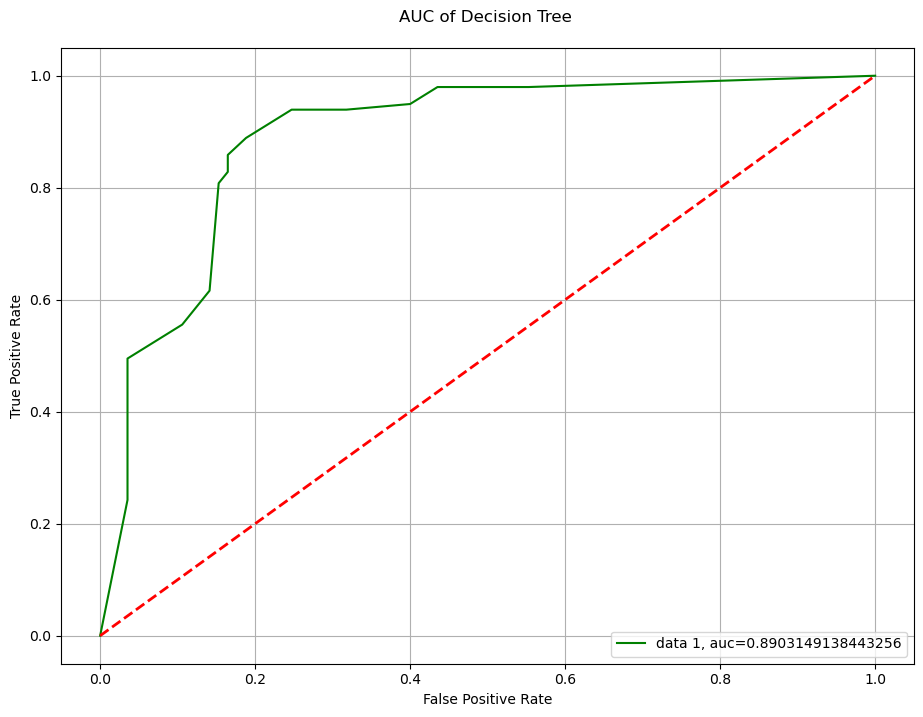

In [48]:
#AUC
dt_pred_proba =dt_best.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  dt_pred_proba)
dt_auc = metrics.roc_auc_score(y_test, dt_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(dt_auc),color='green')

lw = 2
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Decision Tree \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [49]:
dt_acc = accuracy_score(y_test, dt_pred)*100
dt_recall = recall_score(y_test,dt_pred)*100
dt_pre = precision_score(y_test,dt_pred)*100
dt_f1 = f1_score(y_test,dt_pred)*100

decisionTree = DecisionTreeClassifier()
decisionTree.fit(Xtrain, ytrain)

decisionTree_accuracy = decisionTree.score(Xtest, ytest)
decisionTree_rmse = mean_squared_error(ytest,decisionTree.predict(Xtest),squared=False)
decisionTree_mse = mean_squared_error(ytest,decisionTree.predict(Xtest))



print("Accuracy: ", decisionTree_accuracy)
print("RMSE: ", decisionTree_rmse)
print("MSE: ", decisionTree_mse)

Accuracy:  0.7840909090909091
RMSE:  0.4646601886422926
MSE:  0.2159090909090909


## Evaluation

### 1. Accuracy, MSE and RMSE

<div class="alert alert-block alert-info">Comparison of Each Model</div>

In [50]:
df_model = pd.DataFrame.from_dict({
                    'Model':['KNN','SVM', 'Logistic Regression', 'Decision Tree'],
                    'Accuracy':[knn_accuracy, clf_accuracy, logistic_accuracy, decisionTree_accuracy],
                    'MSE':[knn_mse, clf_mse, logistic_mse, decisionTree_mse],
                    'RMSE':[knn_rmse, clf_rmse, logistic_rmse, decisionTree_rmse]
                    }).set_index('Model')

print(display(df_model))

,Accuracy,MSE,RMSE
Model,,,
KNN,0.744318,0.255682,0.505650
SVM,0.647727,0.352273,0.593526
Logistic Regression,0.812500,0.187500,0.433013
Decision Tree,0.784091,0.215909,0.464660


None


<div class="alert alert-block alert-info">Best Performance</div>

In [51]:
print("Max of accuracy : ", max(knn_accuracy, clf_accuracy, logistic_accuracy, decisionTree_accuracy))
print("Min of MSE      : ", min(knn_mse, clf_mse, logistic_mse, decisionTree_mse))
print("Min of RMSE     : ", min(knn_rmse, clf_rmse, logistic_rmse, decisionTree_rmse))

Max of accuracy :  0.8125
Min of MSE      :  0.1875
Min of RMSE     :  0.4330127018922193


### 2. Confusion Matrix

#### 1. K-Nearest Neighbour (KNN) - Lai Si Hua

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# make predictions on the test data and store the predictions in a variable
ypred = knn.predict(Xtest)

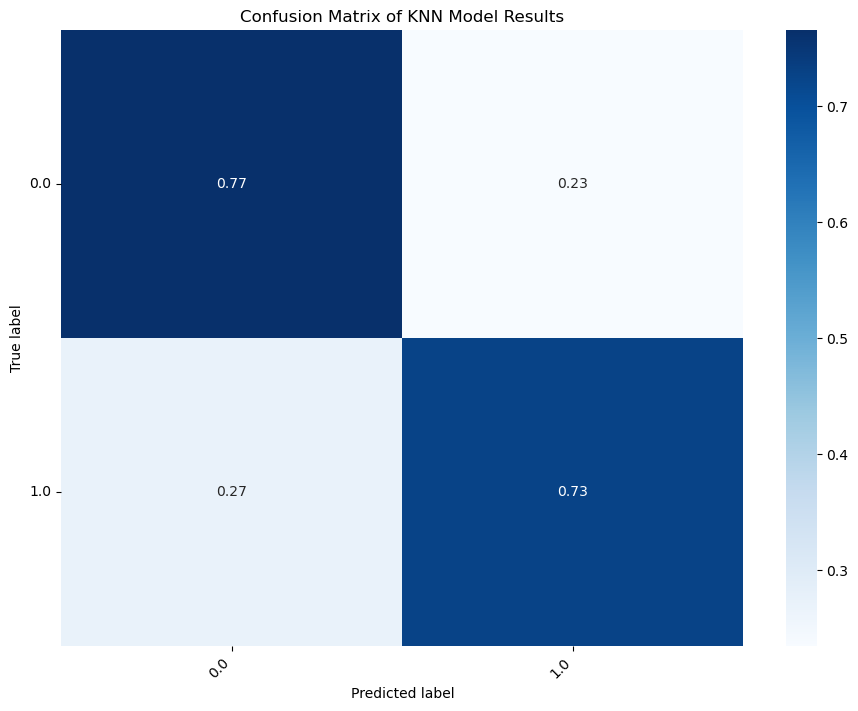

Evaluation of KNN Model
Accuracy  :  0.7443181818181818
Precision :  0.7840909090909091
Recall    :  0.7263157894736842
F1 Score  :  0.7540983606557377


In [53]:
from sklearn.metrics import confusion_matrix

# conmat - store the confusion matrix generated
conmat = confusion_matrix(ytest, ypred)

# create dataframe from conmat array
val = np.mat(conmat)
classnames = list(set(ytrain))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)

# display as percentages of a total number
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

# generate confusion matrix by Seaborn heatmap
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of KNN Model Results')

plt.show()

knn_cm_accuracy = accuracy_score(ytest, ypred)
knn_cm_precision = precision_score(ytest, ypred)
knn_cm_recall = recall_score(ytest, ypred)
knn_cm_f1score = f1_score(ytest, ypred)

print("Evaluation of KNN Model")
print('Accuracy  : ', knn_cm_accuracy)
print('Precision : ', knn_cm_precision)
print('Recall    : ', knn_cm_recall)
print('F1 Score  : ', knn_cm_f1score)

#### 2. SVM - Lai Si Hua

In [54]:
ypred = clf.predict(Xtest)

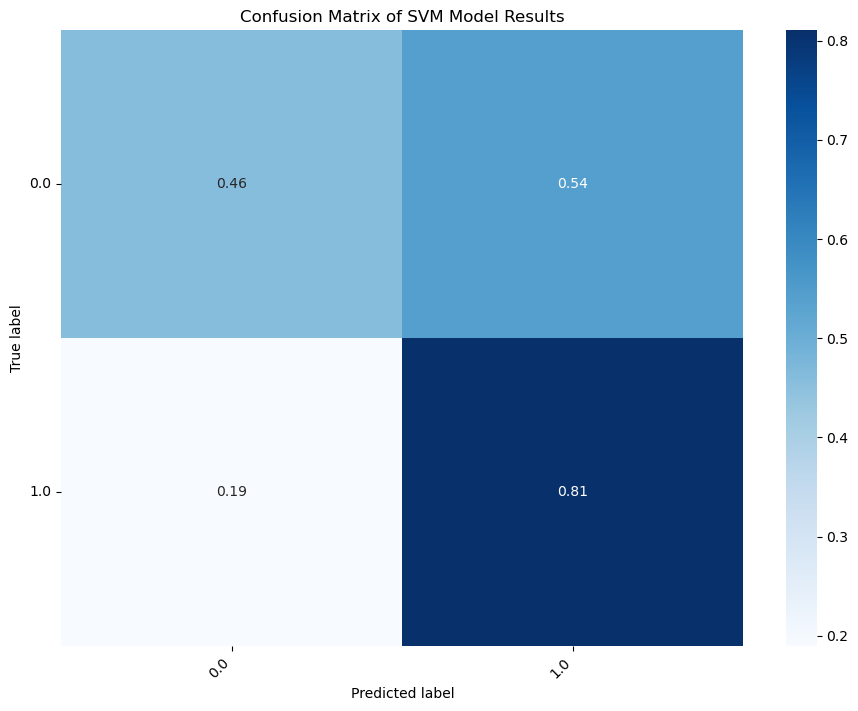

Evaluation of SVM Model
Accuracy  :  0.6477272727272727
Precision :  0.6363636363636364
Recall    :  0.8105263157894737
F1 Score  :  0.7129629629629629


In [55]:
# conmat - store the confusion matrix generated
conmat = confusion_matrix(ytest, ypred)

# create dataframe from conmat array
val = np.mat(conmat)
classnames = list(set(ytrain))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)

# dispaly as percentages of a total number
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

# generate confusion matrix by Seaborn heatmap
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of SVM Model Results')

plt.show() 

clf_cm_accuracy = accuracy_score(ytest, ypred)
clf_cm_precision = precision_score(ytest, ypred)
clf_cm_recall = recall_score(ytest, ypred)
clf_cm_f1score = f1_score(ytest, ypred)

print("Evaluation of SVM Model")
print('Accuracy  : ', clf_cm_accuracy)
print('Precision : ', clf_cm_precision)
print('Recall    : ', clf_cm_recall)
print('F1 Score  : ', clf_cm_f1score)

#### 3. Logistic Regression - Lam Wai Hong

In [56]:
ypred = logistic.predict(Xtest)

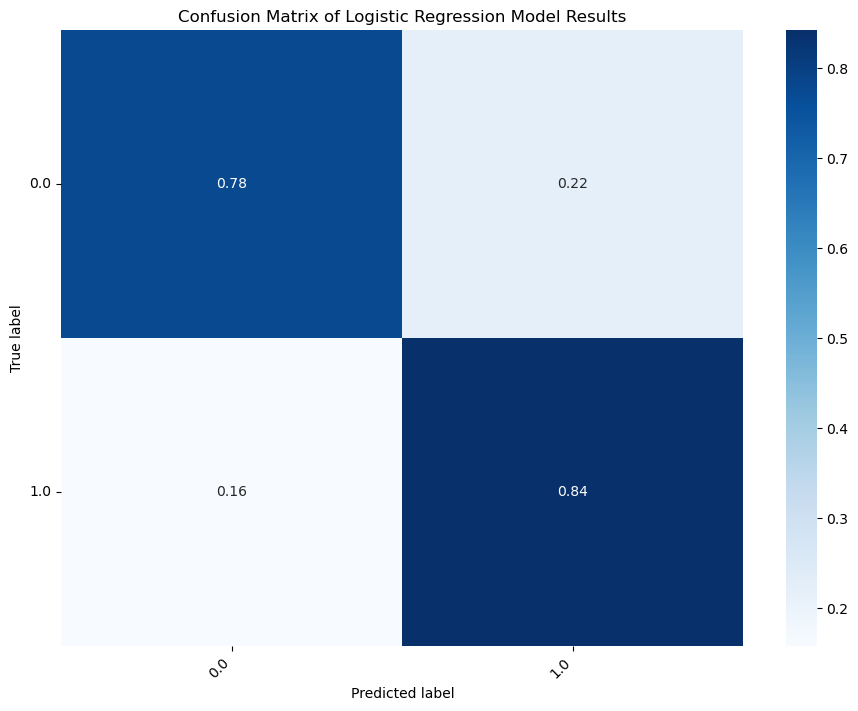

Evaluation of Logistic Regression Model
Accuracy  :  0.8125
Precision :  0.8163265306122449
Recall    :  0.8421052631578947
F1 Score  :  0.8290155440414508


In [57]:
# conmat - store the confusion matrix generated
conmat = confusion_matrix(ytest, ypred)

# create dataframe from conmat array
val = np.mat(conmat)
classnames = list(set(ytrain))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)

# display as percentages of a total number
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

# generate confusion matrix by Seaborn heatmap
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Logistic Regression Model Results')

plt.show()

logistic_cm_accuracy = accuracy_score(ytest, ypred)
logistic_cm_precision = precision_score(ytest, ypred)
logistic_cm_recall = recall_score(ytest, ypred)
logistic_cm_f1score = f1_score(ytest, ypred)

print("Evaluation of Logistic Regression Model")
print('Accuracy  : ', logistic_cm_accuracy)
print('Precision : ', logistic_cm_precision)
print('Recall    : ', logistic_cm_recall)
print('F1 Score  : ', logistic_cm_f1score)

#### 4. Decision Tree - Chong Win Yan

In [58]:
from sklearn.model_selection import train_test_split
y_data = patientData['HeartDisease']
X_data = patientData.drop(['HeartDisease'], axis = 1)

DT_X_train, DT_X_test, DT_y_train, DT_y_test = train_test_split(X_data,y_data,test_size = 0.2, random_state = 1)

In [59]:
dt = DecisionTreeClassifier(random_state=0)
params = {'max_depth': [2, 3, 5, 10, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'criterion': ["gini", "entropy"] }

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [60]:
grid_search.best_estimator_
dt_best=grid_search.best_estimator_
dt_pred = dt_best.predict(X_test)
print("Test Accuracy :", accuracy_score(y_test, dt_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_best.predict(X_test)))

print(classification_report(y_test, dt_pred))
print("The best accuracy of Decision Tree","{:.2f}%".format(100*(accuracy_score(y_test, dt_pred))))

Test Accuracy : 0.8532608695652174
Test Confusion Matrix:
[[69 16]
 [11 88]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        85
           1       0.85      0.89      0.87        99

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The best accuracy of Decision Tree 85.33%


<Figure size 1100x800 with 0 Axes>

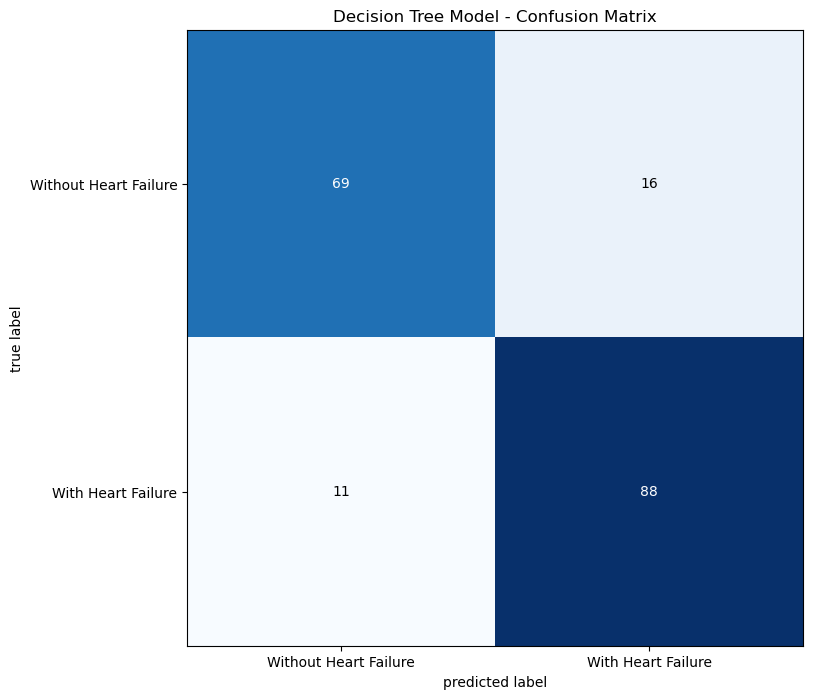

Evaluation of Decision Tree Model
Accuracy  :  0.8532608695652174
Precision :  0.8888888888888888
Recall    :  0.8461538461538461
F1 Score  :  0.8669950738916256


In [61]:
# conmat - store the confusion matrix generated
conmat = confusion_matrix(ytest, ypred)

cm = confusion_matrix(y_test,dt_pred)
plt.figure()
plot_confusion_matrix(cm, hide_ticks=True)
plt.title("Decision Tree Model - Confusion Matrix",)
plt.xticks(range(2), ["Without Heart Failure","With Heart Failure"])
plt.yticks(range(2), ["Without Heart Failure","With Heart Failure"])
plt.show()

decisionTree_cm_accuracy = accuracy_score(y_test,dt_pred)
decisionTree_cm_precision = recall_score(y_test,dt_pred)
decisionTree_cm_recall = precision_score(y_test,dt_pred)
decisionTree_cm_f1score = f1_score(y_test,dt_pred)

print("Evaluation of Decision Tree Model")
print('Accuracy  : ', decisionTree_cm_accuracy)
print('Precision : ', decisionTree_cm_precision)
print('Recall    : ', decisionTree_cm_recall)
print('F1 Score  : ', decisionTree_cm_f1score)

#### <div class="alert alert-block alert-info">Comparison of Each Model</div>

In [62]:
df_performance = pd.DataFrame.from_dict({
                    'Model':['KNN','SVM', 'Logistic Regression', 'Decision Tree'],
                    'Accuracy':[knn_cm_accuracy, clf_cm_accuracy, logistic_cm_accuracy, decisionTree_cm_accuracy],
                    'Precision':[knn_cm_precision, clf_cm_precision, logistic_cm_precision, decisionTree_cm_precision],
                    'Recall':[knn_cm_recall, clf_cm_recall, logistic_cm_recall, decisionTree_cm_recall],
                    'F1-score':[knn_cm_f1score, clf_cm_f1score, logistic_cm_f1score, decisionTree_cm_f1score]
                    }).set_index('Model')

print(display(df_performance))

,Accuracy,Precision,Recall,F1-score
Model,,,,
KNN,0.744318,0.784091,0.726316,0.754098
SVM,0.647727,0.636364,0.810526,0.712963
Logistic Regression,0.812500,0.816327,0.842105,0.829016
Decision Tree,0.853261,0.888889,0.846154,0.866995


None


<div class="alert alert-block alert-info">Best Performance</div>

In [63]:
# print()
print("Max of Accuracy  : ", max(knn_cm_accuracy, clf_cm_accuracy, logistic_cm_accuracy, decisionTree_cm_accuracy))
print("Max of Precision : ", max(knn_cm_precision, clf_cm_precision, logistic_cm_precision, decisionTree_cm_precision))
print("Max of Recall    : ", max(knn_cm_recall, clf_cm_recall, logistic_cm_recall, decisionTree_cm_recall))
print("Max of F1 Score  : ", max(knn_cm_f1score, clf_cm_f1score, logistic_cm_f1score, decisionTree_cm_f1score))

Max of Accuracy  :  0.8532608695652174
Max of Precision :  0.8888888888888888
Max of Recall    :  0.8461538461538461
Max of F1 Score  :  0.8669950738916256


#### `Based on perfromance of model on Part I & II, Decision Tree is the best.`

## Deployment

In [64]:
# Decision Tree
from sklearn.metrics import mean_squared_error

final_decisionTree = DecisionTreeClassifier()
final_decisionTree.fit(X_train, y_train)

# display accuracy
final_decisionTree_accuracy = final_decisionTree.score(X_test, y_test)
print("Accuracy: ", final_decisionTree_accuracy)

Accuracy:  0.7934782608695652


In [65]:
#Decision Tree
def predictFunction(f1,f2,f3,f4,f5,f6,f7): 
    output_predict = final_decisionTree.predict([[f1,f2,f3,f4,f5,f6,f7]])
    
    if(output_predict == 1):
        output_predict = 'People suffering from heart failure.'
    else:
        output_predict = 'People did not suffer from heart failure.'
    
    return output_predict

In [66]:
grid_search.best_estimator_
dt=grid_search.best_estimator_
dt_pred = dt.predict(DT_X_test)

In [71]:
# import warnings
warnings.filterwarnings("ignore")

def mainProgram():
    while True:
        try:
            f1 = int(input("Enter age                                                                                         : "))
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue
            
    while True:
        try:
            f2 = int(input("Is the patient have chest pain type? \n  [1(Typical Angina) or 2(Atypical Angina) or 3(Non-anginal Pain) or 4(Asymptomatic)]             : "))
            if  f2 != int(1) and f2 != int(2) and f2 != int(3) and f2 != int(4):
                print("Only 1 to 4 are allowed!\n")
                continue
            else:
                break
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue
    while True:
        try:  
            f3 = int(input("Enter resting blood pressure [mm Hg]                                                              : "))
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue
    while True:
        try:
            f4 = int(input("Enter fasting blood sugar [1(FastingBS>120) or 2(otherwise)]                                      : "))
            if  f4 != int(1) and f4 != int(2):
                print("Only 1 to 2 are allowed!\n")
                continue
            else:
                break
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue
    while True:
        try:
            f5 = int(input("Enter resting electrocardiogram results\n  [1(Normal) or 2(ST-T wave abnormality) or 3(Probable or definite left ventricular hypertrophy)] : "))
            if  f5 != int(1) and f5 != int(2) and f5 != int(3):
                print("Only 1 to 3 are allowed!\n")
                continue
            else:
                break
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue
    while True:
        try:
            f6 = float(input("Enter old peak                                                                                    : "))
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue           
    while True:
        try:
            f7 = int(input("Enter ST-slope\n [1(Up) or 2(Flat) or 3(Down)]                                                                    : "))
            if  f7 != int(1) and f7 != int(2) and f7 != int(3):
                print("Only 1 to 3 are allowed!\n")
                continue
            else:
                break
            break
        except ValueError:
            print("Please enter numeric only...\n")
            continue
            

 
    
    result = predictFunction(f1,f2,f3,f4,f5,f6,f7)
    print("\n===========================================================================")
    print("Heart Failure predicted result: ", result)
    print("=============================================================================")
    return

mainProgram()

Enter age                                                                                         : 2
Is the patient have chest pain type? 
  [1(Typical Angina) or 2(Atypical Angina) or 3(Non-anginal Pain) or 4(Asymptomatic)]             : 0
Only 1 to 4 are allowed!

Is the patient have chest pain type? 
  [1(Typical Angina) or 2(Atypical Angina) or 3(Non-anginal Pain) or 4(Asymptomatic)]             : 2
Enter resting blood pressure [mm Hg]                                                              : 120
Enter fasting blood sugar [1(FastingBS>120) or 2(otherwise)]                                      : 0
Only 1 to 2 are allowed!

Enter fasting blood sugar [1(FastingBS>120) or 2(otherwise)]                                      : 2
Enter resting electrocardiogram results
  [1(Normal) or 2(ST-T wave abnormality) or 3(Probable or definite left ventricular hypertrophy)] : 0
Only 1 to 3 are allowed!

Enter resting electrocardiogram results
  [1(Normal) or 2(ST-T wave abnormality) or 3(Prob